<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Statics_For_DataScience/Statics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Konu Başlıkları
* Örnek Teorisi (Örneklem): Bir veri setini temsil eden alt küme. Tüm veri setiyle uğraşmak yerine, onu en iyi temsil eden alt lümeyi alıp üzerinde yorumlamalar yapmak daha hızlıdır.
* Betimsel İStatistikler: Merkezi Eğilim Ölçüleri ve Dağılım Ölçüleri ile biraz giriş yapmıştık. Koveryans, korelasyonu ele alacağız. 
* Güven Aralıkları: Elde ettiğimiz istatistikler ile Güven Aralıklarını hesaplayacağız.
* Olasılık Dağılımları: Elimizdeki rastgele değişkenlere göre olasılık dağılımı nasıl hesaplanırı inceleyeceğiz. Bunları Binom ve Bernoulli ile göreceğiz.
* Hipotez Testleri: Tıbbi'de gördüğün konu ile aynı. A/B Testlerini ele alacağız.
* Varyans Analizi: İkiden fazla grup üzerinde ortalamaya ilişkin test yapmaya işlemlerini göreceğiz. 
* Korelasyon Analizi: Çok değişkenli yöntemler...
<br> <br>

*Without a grounding in statistics, a Data Scientist is a Data Lab Assistant.* -Martyn Jones, Managing Director at Cambriano Energy
<br>
*İstatistik veri bliminin "bilim", maine öğrenmesinin "öğrenme" kısmıdır.*
<br>
Elimizdeki veri setinin iyi olması, fazla olmasından çok daha iyidir. İyi olması aynı zamanda yansız olması anlamına da gelir.

# Örnek Teorisi
 Örneklem, Örneklem Dağlımı ve Merkezi Limit Teoremi

In [1]:
import numpy as np

In [2]:
populasyon = np.random.randint(0,80,10_000)

In [3]:
populasyon[0:10]

array([27, 62, 24,  4, 41,  8, 57, 40,  9, 40])

Örneklem çekme:
1. Önce seed() işlemi yapılır. Bu işlem: yapılacak olan işlemlerin her tekrar edildiğinde aynı sonucları getirmesini garanti altına alan işlemdir. Eğer koymazsak her veri çektğimizde farklı veriler gelir bu yüzdende her fonksiyonu çağırdığımızda farklı sonuçlaralırız. Seed() içine yazılan değer ise bir size belirtmemekte, bir kayıt numarası belirtmektedir. Çekeceğin elemana id atamak gibi düşünebilirin. Bu seed() işlemini MAkine Öğrenmesi Bölümünde'de göreceğiz.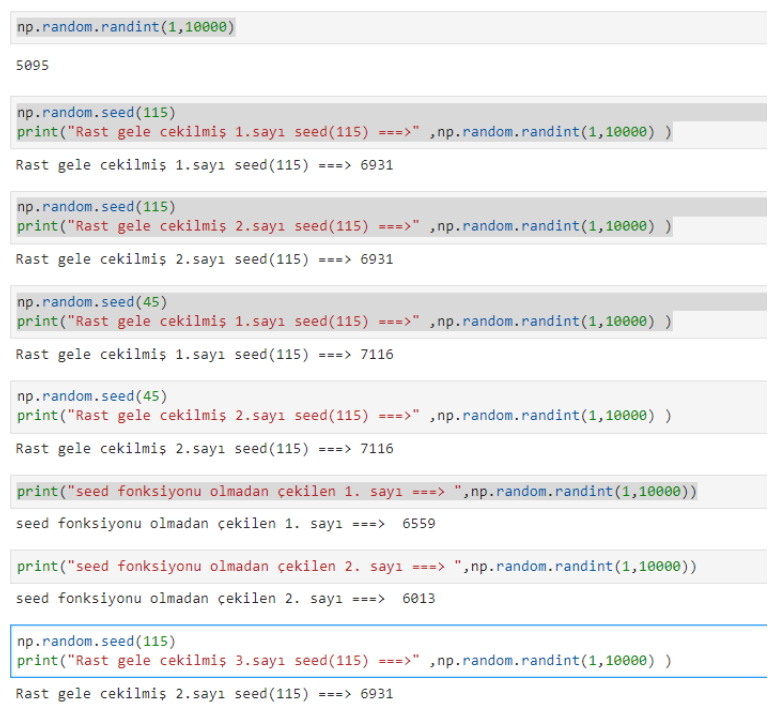

In [4]:
np.random.seed(115)
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([74, 35, 47, 39, 12, 19, 61, 64, 16, 75])

In [5]:
orneklem.mean()

38.6

In [6]:
populasyon.mean()

39.5026

# Betimsel İstatistikler
* Ortalama - Medyan - Mod - Kartiller
* Değişim Aralığı- Standart Sapma- Kovaryans -Korelasyon 

* Kovaryans: İki değişken arasındaki ilişkinin değişkenlik ölçüsüdür. Daha teknik bir tabirle, iki rassal değişkenin kendi ortalamalarından olan sapmalarının, çarpımlarının beklenen değeridir. \
Hatırlatma, Varyans, ortalama etrafındaki dağılımın ölçüsüydü. \
Gösterimi: `cov(X,Y) = E[(X-E[X])(Y-E[Y])]` 
* Korelasyon: İkideğişken arasındaki ilişkiyi, ilişkinin anlamlı olup olamdığını, ilişkinin şiddetini ve yönünü ifade eden istatiksel bir tekniktir.
* Korelasyon iki değişkenin ilişkisyle ilgileniyor. Kovaryans ise iki değişken araındaki ilişkinin değişkenliği ile ilgileniyor. 

In [7]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [10]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import researchpy as rp

In [12]:
rp.summary_cont(df[["total_bill","tip","size"]]) #sürekli değişkenleri bu fonksiyon ile betimliyoruz 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [13]:
rp.summary_cat(df[["sex","smoker","day"]]) #kategorik değişkenleri bu fonksiyon ile betimliyoruz 

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [14]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [15]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


# Güven Aralığı
Anakütle (popülasyon) parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır. Tıbbi'dekinin aynısı.
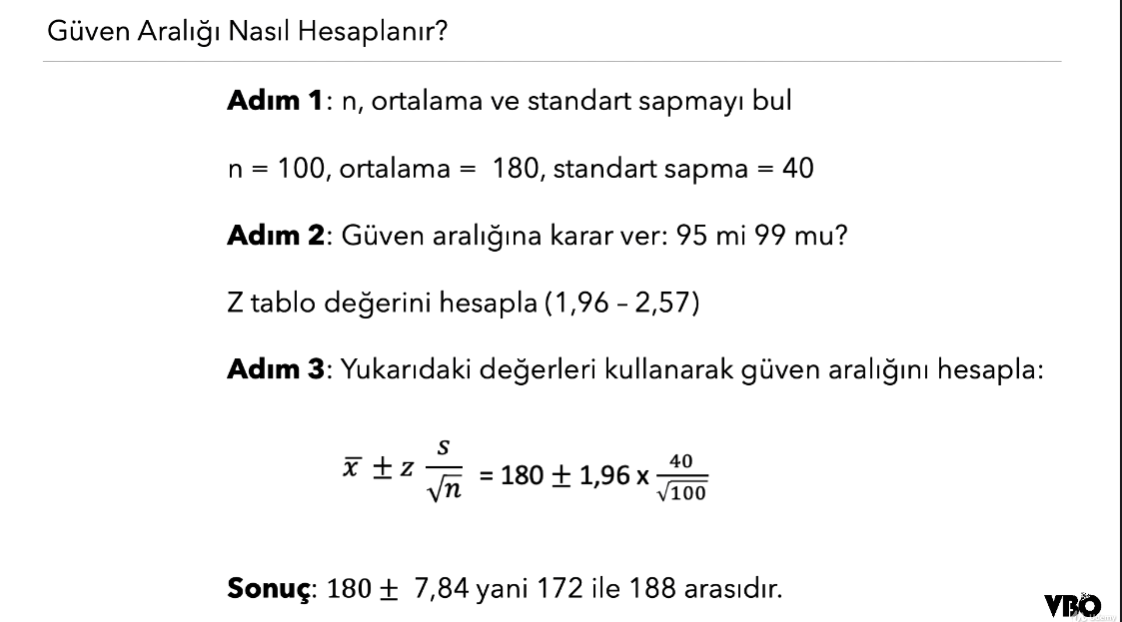

## İş Uygulaması
### Fiyat Stratejisi Karar Destek Sistemi
* Problem: CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor.

* Detaylar:
  * Satıcı, alıcı ve bir ürün var.
  * Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor.
  * Optimum fiyat, bilimsel ve esnek olarak bulunmak isteniyor.


In [16]:
import numpy as np

In [17]:
fiyatlar = np.random.randint(10,110,1_000) # (min tl, max tl, kişi sayısı)

In [18]:
fiyatlar.mean()

59.099

In [19]:
import statsmodels.stats.api as sms

In [20]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(57.27913246141933, 60.91886753858066)

Yukarıdaki değerler güven aralıkalarıdır. Bunun anlamışı: \
Kullanıcılar %95 oranında 57 ile 60 tl arasında değerler teklif etmektedir. %5 ise bu değerler dışında teklif vermektedir. %95 bir kabuldur, bu yüzden bu kütüphanede bunu tercih etmiştir. \
confidence intervals = güven aralıkları 

# Olasılığa Giriş ve Olasılık Dağılımları
**Olasılık,** olayların olabilirliğinin sayısal ifadesidir. Bir oalyın meydana gelmesi için uygun durum sayısının o konuda oluşabileck tüm elverişli durum sayısına oranıdır. \
**Rassal Değişken,** değişkenlerini bir deneyin sonucundan alan değişkene rassal değişken denir. Yazı-Tura, maaş, .... \
**Dağılım,** evrendeki gerçekleşen olayların sayısal hallerinin ortaya çıkardığı yapıya Dağılım denir. \
**Olasılık Dağılımı,** bir rassal olaya ait değerler ve bu değerlerin gerçekleşme olasılıklarının bir arada ifade edilmesine Olasılık Dağılımı denir.\
**Olasılık Fonksiyonu,** bir değişkenin olasılığının hesaplanmasına yarayan fonksiyondur. 
<br><br>
Veri Bilimci olarak temel amaçlarımızdan birisi belirsizlikleri azaltmak. Bunun için Olasılık Dağılımları'nı kullanıyoruz.
<br><br>
## Kesikli ve Sürekli Olasılık Dağılımları
* Kesikli olasılık dağılımları
  * Bernoulli
  * Binom
  * Poisson
* Sürekli Olasılık Dağılımları
  * Normal Dağılım
  * Üniform Dağılım
  * Üstel Dağılım

### Bernoulli Dağılımları
Başarılı-başarısız, olumlu-olumsuz şeklindeki iki sonuçlu olaylar ile ilgilenildğinde kullanılan kesikli olasılık dağılımıdır.
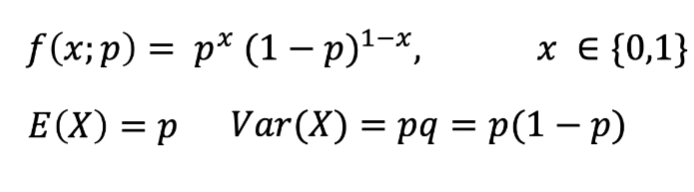

E, beklenen değer. \
Var(yans), bize merkez etrafındaki dağılımı verecek. \
f(x;p), olasılık fonksiyonu.

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

In [21]:
# uygulama
from scipy.stats import bernoulli

In [22]:
p = 0.6 # olayın gerçekleşme olasılığı 

In [23]:
rv = bernoulli(p)
rv.pmf(k=1) #probablity mass function = olasılık kütle fonksiyonu, 1 olayın gerçekleşme, 0 ise gerçekleşmeme oranını verir

0.6

In [24]:
rv.pmf(k=0)

0.4

### Büyük Sayılar Yasası
Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.

In [25]:
rng = np.random.RandomState(123)
for i in np.arange(1,21):
  deney_sayisi = 2**i
  yazi_turalar = rng.randint(0,2,size=deney_sayisi)
  yazi_olasiliklari=np.mean(yazi_turalar)
  print("Atış sayısı:", deney_sayisi,"---","Yazı Olasılığı: %.2f "%(yazi_olasiliklari))

Atış sayısı: 2 --- Yazı Olasılığı: 0.50 
Atış sayısı: 4 --- Yazı Olasılığı: 0.00 
Atış sayısı: 8 --- Yazı Olasılığı: 0.62 
Atış sayısı: 16 --- Yazı Olasılığı: 0.44 
Atış sayısı: 32 --- Yazı Olasılığı: 0.47 
Atış sayısı: 64 --- Yazı Olasılığı: 0.56 
Atış sayısı: 128 --- Yazı Olasılığı: 0.51 
Atış sayısı: 256 --- Yazı Olasılığı: 0.53 
Atış sayısı: 512 --- Yazı Olasılığı: 0.53 
Atış sayısı: 1024 --- Yazı Olasılığı: 0.50 
Atış sayısı: 2048 --- Yazı Olasılığı: 0.49 
Atış sayısı: 4096 --- Yazı Olasılığı: 0.49 
Atış sayısı: 8192 --- Yazı Olasılığı: 0.50 
Atış sayısı: 16384 --- Yazı Olasılığı: 0.50 
Atış sayısı: 32768 --- Yazı Olasılığı: 0.50 
Atış sayısı: 65536 --- Yazı Olasılığı: 0.50 
Atış sayısı: 131072 --- Yazı Olasılığı: 0.50 
Atış sayısı: 262144 --- Yazı Olasılığı: 0.50 
Atış sayısı: 524288 --- Yazı Olasılığı: 0.50 
Atış sayısı: 1048576 --- Yazı Olasılığı: 0.50 


Ali Nesin hocanın dediği gibi, deney sayısı arttıkça, olması gerken sonuçlarkendisini ortaya çıakrmıştır.

### Binom Dağılım:
Binom Dağılım, bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.
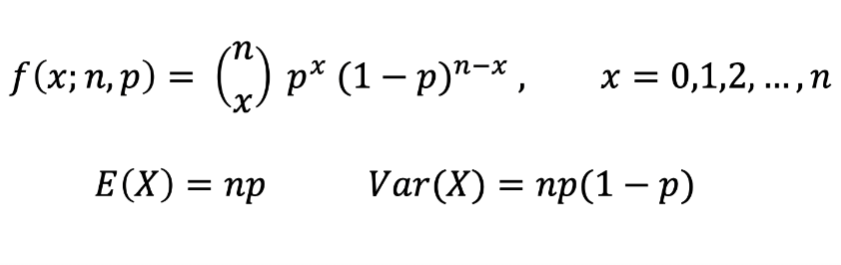
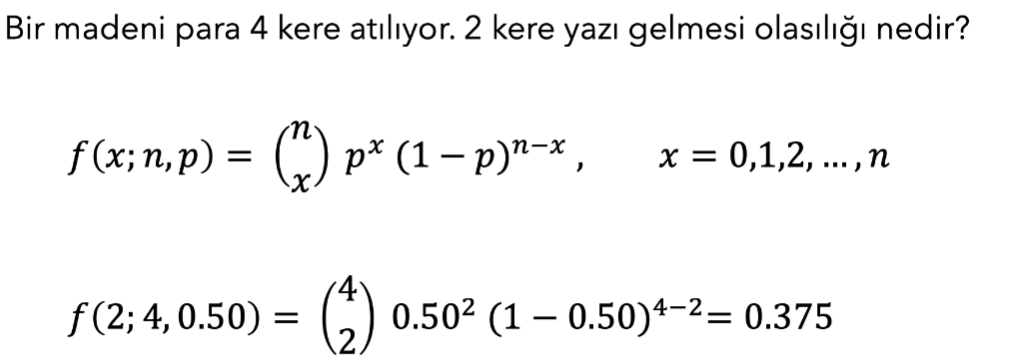

Uygulama: Reklam Harcaması Optimizasyonu \
* Problem: Çeşitli mecralarda reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranlarıoptimize edilmeye çalışııyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniyor. 
* Detaylar: 
  * Bir mecrada reklam verilecek.
  * Dağılım ve reklama tıklama olasılığı biliniyor (0.01)
  * Soru: Reklamı 100 kişi görüntülediğinde 1,5,10 tıklanmasının olasılığı nedir?
  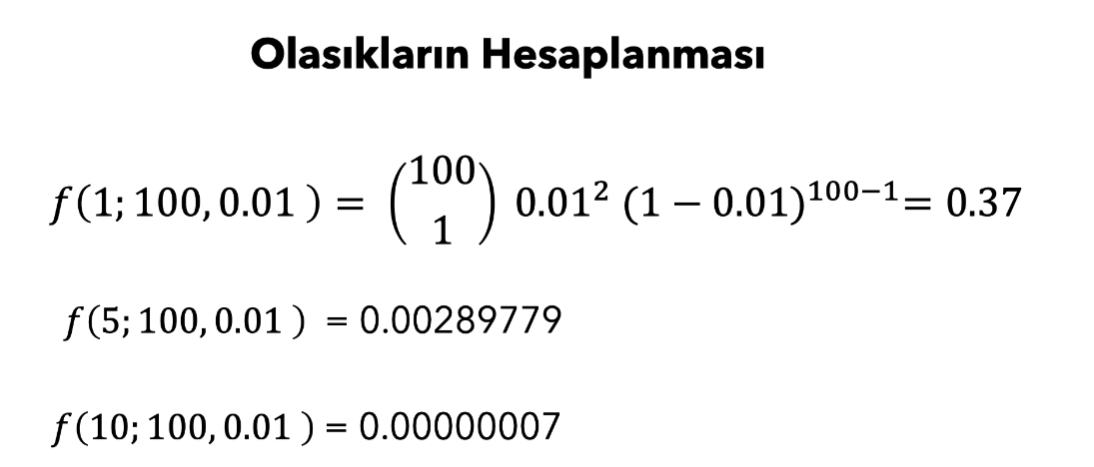

In [26]:
from scipy.stats import binom

In [27]:
p = 0.01
n = 100
rv = binom(n,p)
print("1 tıklanma: ",rv.pmf(1))
print("5 tıklanma: ",rv.pmf(5))
print("10 tıklanma: ",rv.pmf(10))


1 tıklanma:  0.36972963764972666
5 tıklanma:  0.002897787123761478
10 tıklanma:  7.006035693977194e-08


### Poison Dağılımı
Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.
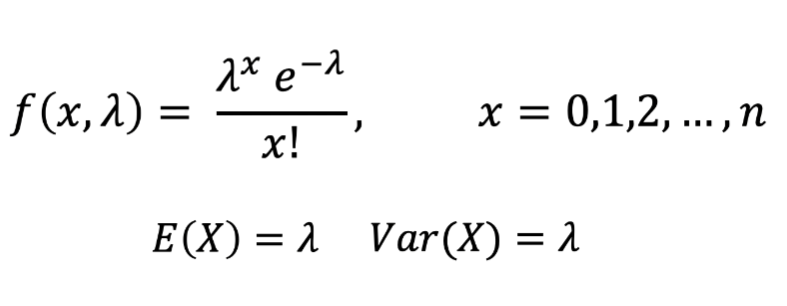 \
Lamda, beklenen sonucun ortalama gerçekleşme sayısı.. Lamdanın varyansa yani dağılıma eş olduğunuda unutma. \
Poison Dağılımına örnek:
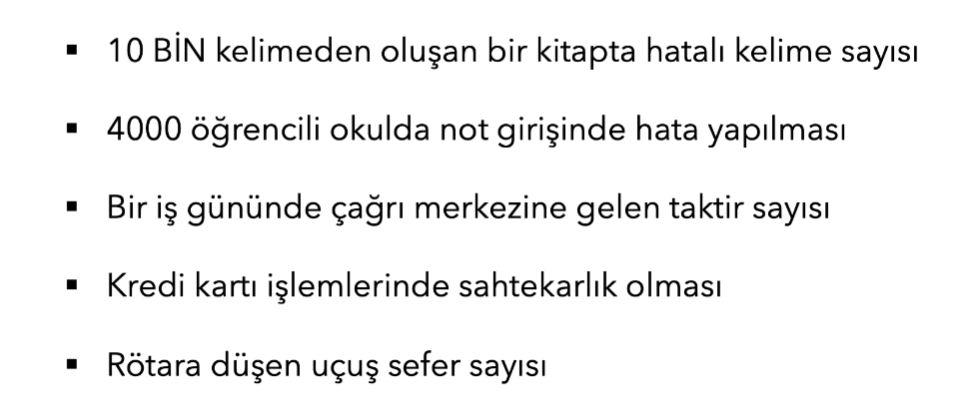

Poison'un nadir olaylarda geçerli olduğunu söyledik. Genel kabule göre bir olayın nadir kabul edilebilmesi için: \
* n > 50 
* n * p < 50 olmalıdır. n*p lamdaya eşittir.
Poison ile ilgilide bilinmesi gerekenler:
* Rassal denemeler iki sonuçlu olmalıdır.
* Aynı koşullar altında gerçekleştirilmelidir.
* Rassal denemeler birbirinden bağımsız olmalıdır.

<br> <br>
Poison Örnek:
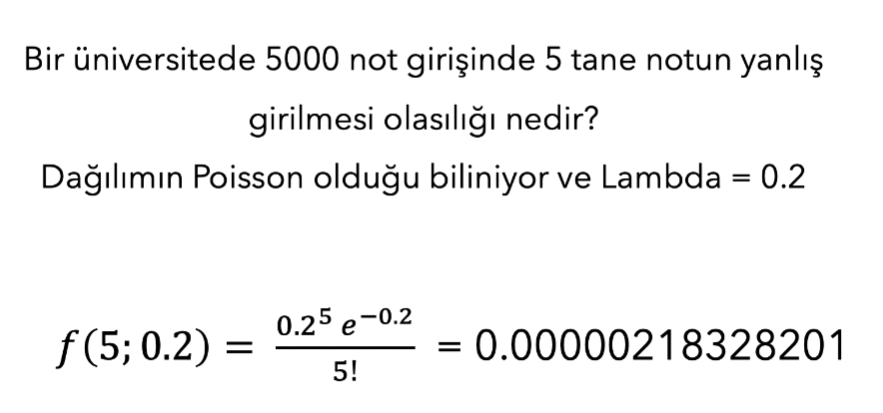


İş uygulaması: İlan Girişi Hata Olasılıklarının Hesaplanması \
Problem: Hatalı ilan girişlerinin hesaplanması isteniyor.
Detaylar: 
* Bir yıl süresince ölçümler yapılıyor.
* Dağılım biliniyor (Poison) ve Lambda 0.1 (ortalama hata sayısı)
* Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?
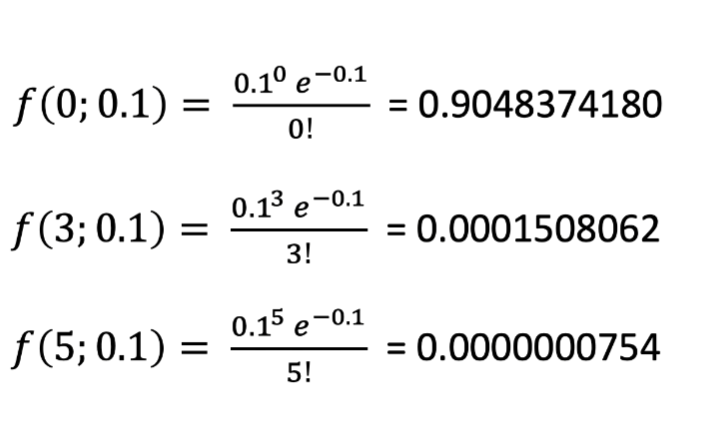

In [28]:
from scipy.stats import poisson  

In [29]:
lambda_value=0.1
rv = poisson(mu= lambda_value)
print(rv.pmf(k=0))
print(rv.pmf(k=3))
print(rv.pmf(k=5))


0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


### Normal Dağılım
En önemli dağılım türüdür, çünkü en çok kullanılanıdır. Normal dağıldığı bilinen sürekli rassal değişkenler olasılığının hesaplaması için kullanılır. Sürekli değişkenelrde bir alan hesabı yapmamız gerektiği için integral alınmalıdır, aklında bulunsun.
Formülü:
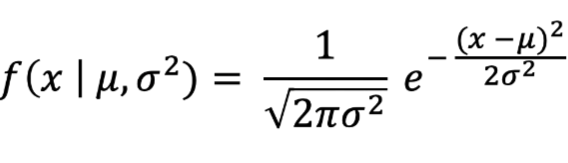

Normal Dağılım'ın beklenen değeri mü'dür. Varyansıda sigma karedir.

İş Uygulaması: Ürün Satış Olasılıklarının Hesaplanması
* Problem: Bir yatırım/ toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor. Yani adamalr geecek ay 2000 satış yapma olasılığını soruyor sana. 
* Detaylar: 
  * Dağılımın normal olduğu biliniyor (Bunu anlamanın iki yolu var, ilki veride görselleştirme yapılır ve çıkan grafik normal ortadan bombeli yanlara doğru azalıyorsa normal dağılmış deriz. İkinci yolu, hipotez testleri yaparak anlaşılabilir.)
  * Aylık ortalama satış sayısı 80k std 5k
  * 90k dan fazla satış yapma oalsılığımız nedir? \
  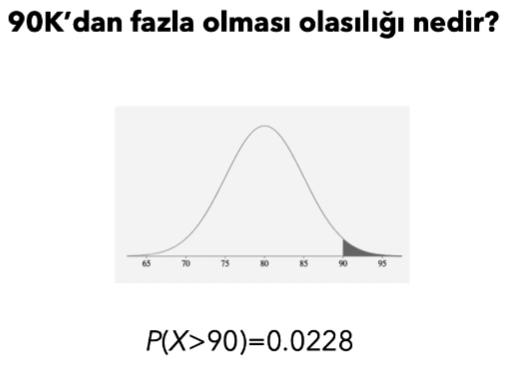 
  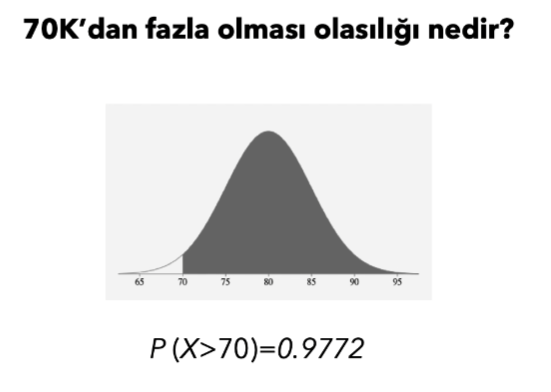
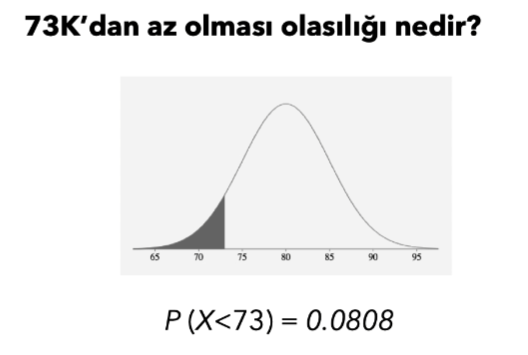
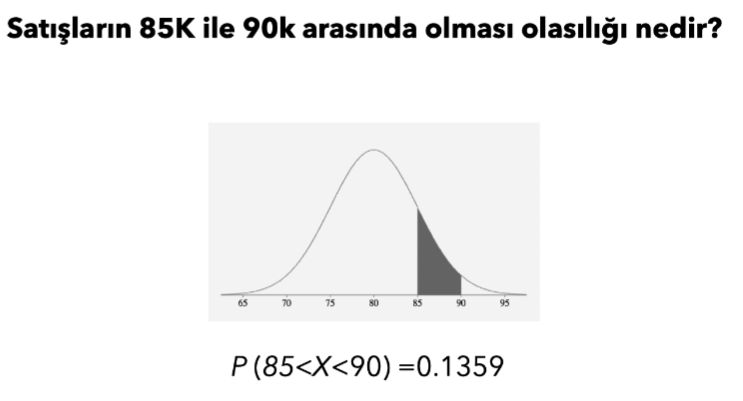


In [30]:
from scipy.stats import norm

In [31]:
# 90 dan fazla olması
istenilen=90
ortalama=80
standartSapma=5
1-norm.cdf(istenilen,ortalama,standartSapma)  # cdf cumilative denisty func, alan tarayacağmz için kümilatif fonksiyon kullanıyoruz.

0.02275013194817921

1'den çıkarma kısmını Tıbbiden hatırla, alanın tamamı 1'di, 90 dan fazla olamsı için çıkarıyorduk

In [32]:
# 70 den fazla olması
istenilen=70
ortalama=80
standartSapma=5
1-norm.cdf(istenilen,ortalama,standartSapma)

0.9772498680518208

In [33]:
# 73'ten az olması
istenilen=70
ortalama=80
standartSapma=5
norm.cdf(istenilen,ortalama,standartSapma)   # az olması istenildiğinde çıkarma yapmıyoruz

0.022750131948179195

In [34]:
# 85-90 arasında olması
norm.cdf(90,80,5)-norm.cdf(85,80,5) # sonuçta aralık, üst değerden at değeri çıkartıyorz.

0.13590512198327787

# Özet:
1. Belirsizlikler altında karar vermeye çalışan kimseleriz. Buna alış :) Bir şeyleri modellemeye, veriye dökmeye çalışıyouz. İşte bu belirsizliği gidermeye yönelik kullanılabilecek olan yaklaşımlardan birisi de oalsılık dağılımları. Bize çeşitli konularda olasılık değerleri veriyor.
2. Uygun olasılık fonksiyonları ile olasılık hesaplıyoruz.
